In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Exploratory Data Analysis (EDA)

In [26]:
Data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv", sep=";")

In [27]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


**1.** Look at the shape of data

In [28]:
Data.shape

(891, 12)

**2.** Information about numerical features

In [29]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**3.** Information about all features

In [30]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**4.** Get information about columns

Survived

In [31]:
Data.Survived.value_counts(dropna=False)  #Data['Survived']

0    549
1    342
Name: Survived, dtype: int64

Pclass

In [32]:
Data['Pclass'].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

Sex

In [33]:
Data['Sex'].value_counts(dropna=False)

male       574
female     312
unknown      5
Name: Sex, dtype: int64

How to handle 'Sex'?

In [34]:
Data[Data.Sex == 'unknown']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,Moran; Mr. James,unknown,NaN,0,0,330877,8.4583,NaN,Q
13,14,0,3,Andersson; Mr. Anders Johan,unknown,39.00,1,5,347082,31.2750,NaN,S
28,29,1,3,"O'Dwyer; Miss. Ellen ""Nellie""",unknown,NaN,0,0,330959,7.8792,NaN,Q
49,50,0,3,Arnold-Franchi; Mrs. Josef (Josefine Franchi),unknown,18.00,1,0,349237,17.8000,NaN,S
78,79,1,2,Caldwell; Master. Alden Gates,unknown,0.83,0,2,248738,29.0000,NaN,S


In [35]:
Data.loc[[5, 13], 'Sex'] = 'male'
 #Data.iloc[[5, 13], 4]


**5.** Is the sex an important feature?

<ipython-input-36-012e8342bd10>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Data.groupby('Sex').mean()['Survived'].plot.bar()


<Axes: xlabel='Sex'>

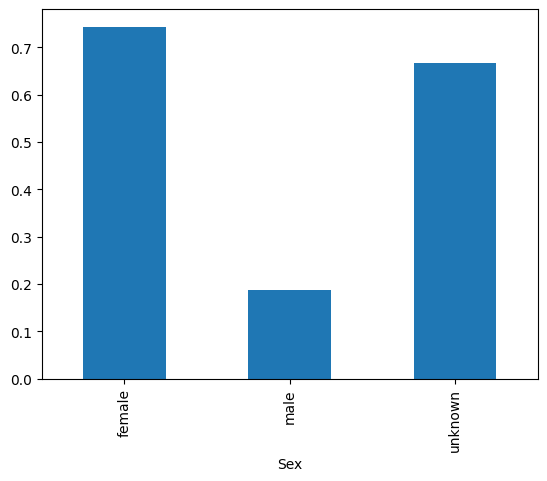

In [36]:
Data.groupby('Sex').mean()['Survived'].plot.bar()

<Axes: xlabel='Sex', ylabel='Survived'>

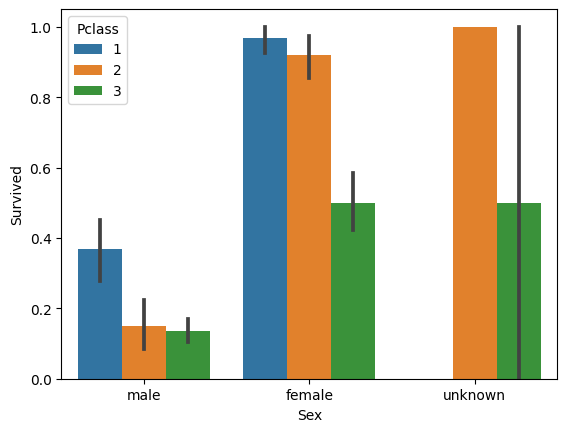

In [37]:
#sns.set_theme(style="whitegrid")
sns.barplot(x="Sex", y="Survived", hue='Pclass', data=Data)
#sns.barplot(x="Sex", y="Survived",  data=Data)

You can fill-in manually

**6.** Delete records with unknown sex

In [38]:
Data.drop(index = Data[Data.Sex == 'unknown'].index, inplace=True)

**7.** Encode column Sex

In [39]:
#Data['Sex'] = Data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
#Data['Sex'] = Data['Sex'].map({'male': 1, 'female': 0})
#Data.replace({'Sex': {'male': 1, 'female': 0}}, inplace = True)
#Data.head()

## Use OneHotEncoder

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
onee = OneHotEncoder(drop='first')

In [42]:
onee.fit(Data[['Sex']])
#Data.Sex = onee.fit_transform(Data[['Sex']]).toarray()

OneHotEncoder(drop='first')

In [43]:
onee.categories_

[array(['female', 'male'], dtype=object)]

In [44]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


**8.** Explore next column 'Age'

In [22]:
Data[Data['Age'].isna()]

In [ ]:
Data['Age'].plot.hist()
#sns.displot(Data.Age, kde=True)

In [ ]:
median_age = Data['Age'].median()
mean_age = Data['Age'].mean()
print(f'Median = {median_age},\nMean = {mean_age}')

In [77]:
#Data.loc[Data[Data['Age'].isna()].index, 'Age'] = mean_age
#Data['Age'].fillna(mean_age, inplace=True)
from sklearn.impute import SimpleImputer
imp = SimpleImputer()
Data['Age'] = imp.fit_transform(Data[['Age']])

In [ ]:
sns.displot(Data.Age, kde=True)

**9.** Feature Embarked

In [ ]:
Data['Embarked'].value_counts(dropna=False)

In [59]:
Data.dropna(subset=['Embarked'], inplace=True)

In [ ]:
sns.barplot(x='Embarked', y='Survived', data=Data)

**10.** 'SibSp'

In [ ]:
Data['SibSp'].unique()

In [ ]:
sns.barplot(x='SibSp', y='Survived', data=Data)

**11.** 'Parch'

In [ ]:
Data['Parch'].unique()

In [ ]:
sns.barplot(x='Parch', y='Survived', data=Data)

**12** 'Cabin'

In [46]:
Data['Cabin'].value_counts(dropna=False)

NaN            684
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

# One-Hot Encoder VS Ordinal Encoder (Label Encoder)
[OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

[OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)

[LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [ ]:
#le = preprocessing.LabelEncoder()   #Use for y
from sklearn.preprocessing import OrdinalEncoder   #Use for X
#from sklearn.preprocessing import OneHotEncoder

In [ ]:
onee.fit_transform(Data[['Embarked']]).toarray()

In [ ]:
onee.categories_

In [ ]:
#Data[onee.categories_[0]] = onee.fit_transform(Data[['Embarked']]).toarray()

##Features and Target Isolation

In [78]:
y = Data['Survived']
X = Data.drop(columns = ['Survived'])

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##Transformation Pipeline

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [50]:
transform1 = ColumnTransformer([('OneHot', OneHotEncoder(drop='first'), ['Sex','Embarked'])], remainder='passthrough')

In [62]:
transform1.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot', OneHotEncoder(drop='first'),
                                 ['Sex', 'Embarked'])])

In [63]:
transform1.transform(X_train)

array([[1.0, 0.0, 1.0, ..., '244310', 13.0, nan],
       [1.0, 0.0, 1.0, ..., '28665', 10.5, nan],
       [1.0, 0.0, 1.0, ..., '19943', 90.0, 'C93'],
       ...,
       [0.0, 0.0, 1.0, ..., '236852', 13.0, nan],
       [1.0, 0.0, 1.0, ..., 'C.A. 18723', 10.5, nan],
       [0.0, 0.0, 1.0, ..., '343120', 7.65, nan]], dtype=object)

In [64]:
transform1.get_feature_names_out()

array(['OneHot__Sex_male', 'OneHot__Embarked_Q', 'OneHot__Embarked_S',
       'remainder__PassengerId', 'remainder__Pclass', 'remainder__Name',
       'remainder__Age', 'remainder__SibSp', 'remainder__Parch',
       'remainder__Ticket', 'remainder__Fare', 'remainder__Cabin'],
      dtype=object)

In [65]:
pd.DataFrame(transform1.transform(X_train), columns=transform1.get_feature_names_out()).head()

,OneHot__Sex_male,OneHot__Embarked_Q,OneHot__Embarked_S,remainder__PassengerId,remainder__Pclass,remainder__Name,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Ticket,remainder__Fare,remainder__Cabin
0,1.0,0.0,1.0,150,2,Byles; Rev. Thomas Roussel Davids,42.0,0,0,244310,13.0,NaN
1,1.0,0.0,1.0,239,2,Pengelly; Mr. Frederick William,19.0,0,0,28665,10.5,NaN
2,1.0,0.0,1.0,225,1,Hoyt; Mr. Frederick Maxfield,38.0,1,0,19943,90.0,C93
3,1.0,0.0,1.0,366,3,Adahl; Mr. Mauritz Nils Martin,30.0,0,0,C 7076,7.25,NaN
4,1.0,0.0,1.0,385,3,Plotcharsky; Mr. Vasil,NaN,0,0,349227,7.8958,NaN


In [80]:
transform2 = ColumnTransformer([('OneHot', OneHotEncoder(drop='first'), ['Sex','Embarked']), ('drop', 'drop', ['PassengerId','Name','Ticket','Cabin'])], remainder='passthrough')

In [81]:
transform2.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot', OneHotEncoder(drop='first'),
                                 ['Sex', 'Embarked']),
                                ('drop', 'drop',
                                 ['PassengerId', 'Name', 'Ticket', 'Cabin'])])

In [82]:
pd.DataFrame(transform2.transform(X_train), columns=transform2.get_feature_names_out()).head()

,OneHot__Sex_male,OneHot__Embarked_Q,OneHot__Embarked_S,remainder__Pclass,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Fare
0,1.0,0.0,1.0,2.0,42.00000,0.0,0.0,13.0000
1,1.0,0.0,1.0,2.0,19.00000,0.0,0.0,10.5000
2,1.0,0.0,1.0,1.0,38.00000,1.0,0.0,90.0000
3,1.0,0.0,1.0,3.0,30.00000,0.0,0.0,7.2500
4,1.0,0.0,1.0,3.0,29.69907,0.0,0.0,7.8958


In [83]:
transform2.transform(X_test)

array([[  1.    ,   0.    ,   1.    , ...,   0.    ,   0.    ,   8.05  ],
       [  1.    ,   0.    ,   1.    , ...,   2.    ,   0.    ,   7.925 ],
       [  0.    ,   0.    ,   1.    , ...,   0.    ,   0.    , 151.55  ],
       ...,
       [  1.    ,   0.    ,   1.    , ...,   0.    ,   0.    ,  32.3208],
       [  0.    ,   0.    ,   1.    , ...,   1.    ,   1.    ,  29.    ],
       [  0.    ,   0.    ,   0.    , ...,   2.    ,   1.    ,  19.2583]])

##Pipeline

In [72]:
from sklearn.pipeline import Pipeline

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
pipe1 = Pipeline([('transform', transform2), ('classifier', KNeighborsClassifier(n_neighbors=5))])

In [85]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'Embarked']),
                                                 ('drop', 'drop',
                                                  ['PassengerId', 'Name',
                                                   'Ticket', 'Cabin'])])),
                ('classifier', KNeighborsClassifier())])

In [88]:
(pipe1.predict(X_test) == y_test).mean()

0.6996587030716723

In [118]:
Data_new = pd.concat((pd.DataFrame(transform2.transform(X),columns=transform2.get_feature_names_out()), y), axis=1)
Data_new.head()

,OneHot__Sex_male,OneHot__Embarked_Q,OneHot__Embarked_S,remainder__Pclass,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Fare,Survived
0,1.0,0.0,1.0,3.0,22.0,1.0,0.0,7.2500,0.0
1,0.0,0.0,0.0,1.0,38.0,1.0,0.0,71.2833,1.0
2,0.0,0.0,1.0,3.0,26.0,0.0,0.0,7.9250,1.0
3,0.0,0.0,1.0,1.0,35.0,1.0,0.0,53.1000,1.0
4,1.0,0.0,1.0,3.0,35.0,0.0,0.0,8.0500,0.0


<Axes: >

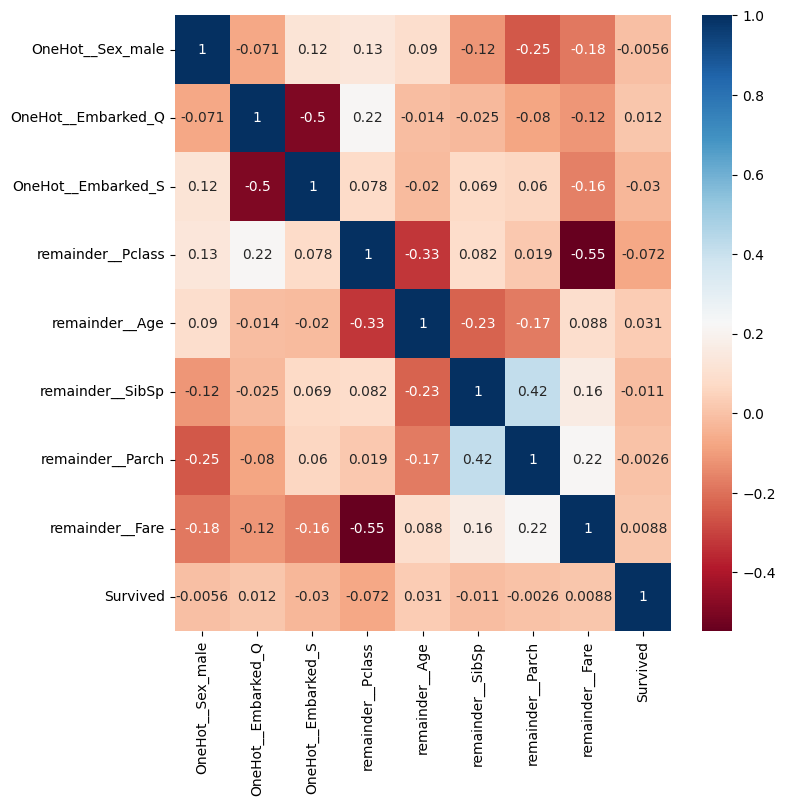

In [119]:
plt.figure(figsize=(8,8))
sns.heatmap(Data_new.corr(), cmap="RdBu", annot=True)

##Bibarization

In [122]:
#pd.cut(Data_new['Age'].astype(int), 5)
pd.qcut(Data['Age'], 5)

In [99]:
# from sklearn.base import BaseEstimator, TransformerMixin
# class BinarizeAge(BaseEstimator, TransformerMixin):
#     def __init__(self, num_bins):
#         self.num_bins = num_bins

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X, y=None):
#         X['Age'] = pd.qcut(X['Age'], self.num_bins, labels=False)
#         return X
from sklearn.preprocessing import KBinsDiscretizer

In [100]:
transform3 = ColumnTransformer([('OneHot', OneHotEncoder(drop='first'), ['Sex','Embarked']),
                                ('drop', 'drop', ['PassengerId','Name','Ticket','Cabin']),
                                #('age_binarize', BinarizeAge(5), ['Age'])], remainder='passthrough')
                                ('age_binarize', KBinsDiscretizer(n_bins=5, encode='ordinal'), ['Age'])], remainder='passthrough')

In [101]:
transform3.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot', OneHotEncoder(drop='first'),
                                 ['Sex', 'Embarked']),
                                ('drop', 'drop',
                                 ['PassengerId', 'Name', 'Ticket', 'Cabin']),
                                ('age_binarize',
                                 KBinsDiscretizer(encode='ordinal'), ['Age'])])

In [102]:
pipe3 = Pipeline([('transform', transform3), ('classifier', KNeighborsClassifier(n_neighbors=5))])
pipe3.fit(X_train, y_train)
(pipe3.predict(X_test) == y_test).mean()

0.757679180887372

In [112]:
Data_new = pd.concat((pd.DataFrame(transform3.transform(X),columns=transform3.get_feature_names_out()), y), axis=1)
Data_new.head()

,OneHot__Sex_male,OneHot__Embarked_Q,OneHot__Embarked_S,age_binarize__Age,remainder__Pclass,remainder__SibSp,remainder__Parch,remainder__Fare,Survived
0,1.0,0.0,1.0,1.0,3.0,1.0,0.0,7.2500,0.0
1,0.0,0.0,0.0,4.0,1.0,1.0,0.0,71.2833,1.0
2,0.0,0.0,1.0,1.0,3.0,0.0,0.0,7.9250,1.0
3,0.0,0.0,1.0,3.0,1.0,1.0,0.0,53.1000,1.0
4,1.0,0.0,1.0,3.0,3.0,0.0,0.0,8.0500,0.0


<Axes: >

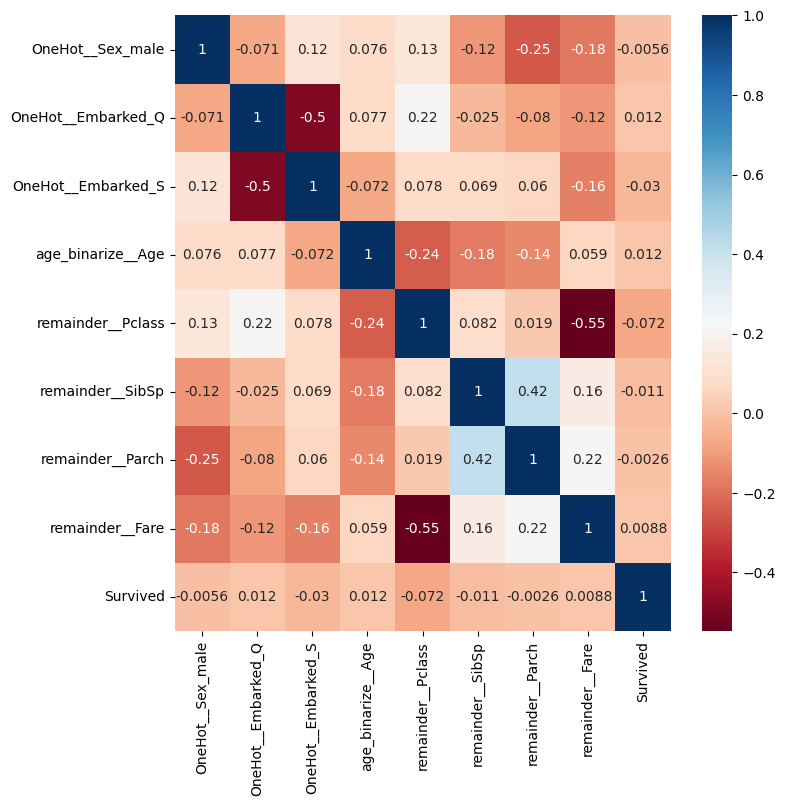

In [117]:
plt.figure(figsize=(8,8))
sns.heatmap(Data_new.corr(), cmap="RdBu", annot=True)

##Scalers
[MinMax](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)

[Standard](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

##Pairwise Plot

In [112]:
sns.pairplot(Data_new, hue='Survived')